## Fear Conditioning Task: Visualisation and Analysis

Author: Gergana Moskova  
Date: 14.12.2024  
Source: https://neurosynth.org/analyses/terms/fear/ 

#### Import the needed libraries

*glob* locates the files.  
*nibabel* reads and loads the fMRI data files.  
*nilearn (plotting)* visualises the fMRI images.  
*matplotlib (Normalize)* to plot and customise the histogram.  
*numpy* calculates the mean and median of the same values.  

In [5]:
# Import libraries
import glob
import nibabel as nib
import nilearn as nl
from nilearn import plotting
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

#### Locate and load the fMRI data files

The *glob* library is used in order to locate fMRI data files without path hardcoding. By using the wildcard "\*" with ".nii.gz", *glob* searches the current directory for all files matching this extension.

The variables **anatomy_img_path** and **function_img_path** are initialised to "None" to handle potential errors. These variables will later store the paths to the anatomical and functional image files.

The function identifies files based on keywords:

 - "anatomical" for anatomical images.  
 -  "fear" for functional brain activity data.

An error is raised if either file is missing. Once located, the paths of both files are printed for confirmation.

In [ ]:
file_paths = glob.glob('*.nii.gz')

# Initialise the paths
anatomy_img_path = None
function_img_path = None

# Locate the anatomical and functional images
for file_path in file_paths:
    if "anatomical" in file_path:
        anatomy_img_path = file_path
    elif "fear" in file_path:
        function_img_path = file_path

# Raise an error message if any of the images are not found
if anatomy_img_path is None:
    raise FileNotFoundError("Anatomical image not found")
if function_img_path is None:
    raise FileNotFoundError("Functional image not found")

# Print the paths
print("Anatomical image: ", anatomy_img_path)
print("Functional image: ", function_img_path)

Anatomical image:  anatomical.nii.gz
Functional image:  fear_uniformity-test_z_FDR_0.01.nii.gz


Use **nib.load()** to load the fMRI files.

In [3]:
# Load the images using nibabel
anatomy_img = nib.load(anatomy_img_path)
function_img = nib.load(function_img_path)

#### Visualise the functional and anatomical files

Use **nl.plotting.plot_stat_map** to plot the functional data ontop of the anatomical scan. The function takes the following arguments:
  - **function_img**: the functional neuroimaging data to be plotted.  
  - **bg_img**: the background image (i.e. the anatomical scan).  
  - **cmap**: specifies the colour map.  
  - **threshold**: filters out values below the specified threshold.
  - **title**: adds the title for the plot.
  - **cut_coords**: selects the coordinates for slicing the anatomical image.
    

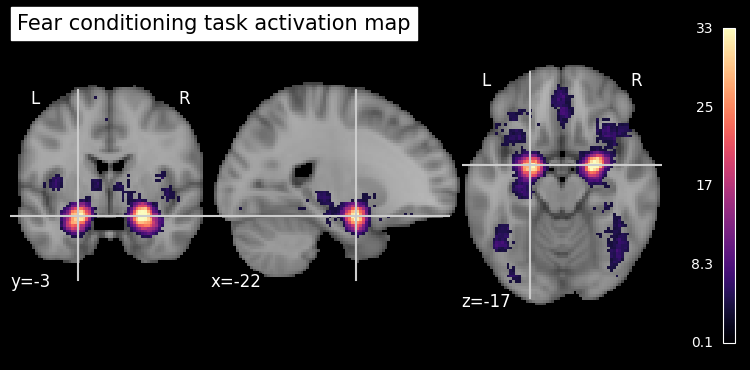

In [6]:
# Plot the functional data on top of the anatomical data
nl.plotting.plot_stat_map(function_img, 
                          bg_img = anatomy_img,
                          cmap = 'magma', 
                          threshold = 0.1, 
                          title = "Fear conditioning task activation map", 
                          cut_coords = (-22, -3, -17))

# Display the plot
plt.show()

#### Create a histogram of positive activation values

First, the numerical data is extracted from the functional image using **function_img.get_fdata()** and negative values are filtered out.
Then, calculate the mean and median.  

Next, the histogram bars are filled with a colour gradient that matches the colour map used in the fMRI plot. Normalise the positive values by using **Normalize()** so the colour gradient reflects the activation levels accurately. A logarithmic scale is applied to the y-axis to improve visualisation.   

Finally, vertical lines are added to indicate the mean and median, along with a title, axis labels, gridlines, and a legend.

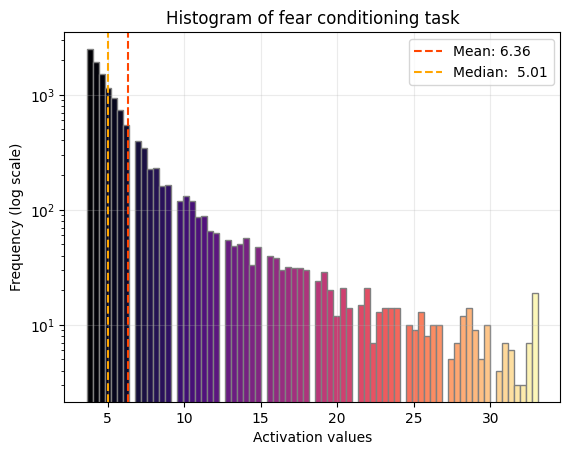

In [ ]:
# Extract the data from the fMRI file
function_data = function_img.get_fdata()

# Select all positive values ( > 0)
pos_values = function_data[function_data > 0]

# Calculate the mean and the median
mean_val = np.mean(pos_values)
median_val = np.median(pos_values)

# Create the histogram
counts, bins, patches = plt.hist(pos_values, bins=75, edgecolor="grey")

# Normalize the positive values for the colormap
norm = Normalize(vmin=min(pos_values), vmax=max(pos_values))

# Apply the magma colormap to the patches
for count, patch in zip(counts, patches):
    color = plt.cm.magma(norm(patch.xy[0]))  # Use the normalized bin value
    patch.set_facecolor(color)

# Add title and labels
plt.title("Histogram of fear conditioning task")
plt.xlabel("Activation values")
plt.ylabel("Frequency (log scale)")
plt.yscale("log")

# Add vertical lines for the mean and median 
plt.axvline(mean_val, color = "orangered", linestyle = "--", label = f"Mean: {mean_val:.2f}")
plt.axvline(median_val, color = "orange", linestyle = "--", label = f"Median: {median_val: .2f}")

# Add a legend
plt.legend()

# Add a grid
plt.grid(True, alpha = 0.25)

# Display the plot
plt.show()
